In [68]:
import pandas as pd
import gensim.corpora as corpora
from gensim.models import Phrases, CoherenceModel
from gensim.models.phrases import Phraser
from gensim.models.wrappers import LdaMallet
from langdetect import detect
from tqdm import tqdm_notebook
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import wordnet
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords
from itertools import chain 
from gensim.models import Phrases
from gensim.models import nmf
from gensim import corpora
from gensim import models
import numpy as np
from gensim.models import CoherenceModel
tqdm_notebook().pandas()


/Users/abhigya/anaconda3/envs/thesisnew/lib/python3.7/site-packages/ipykernel_launcher.py:20: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


/Users/abhigya/anaconda3/envs/thesisnew/lib/python3.7/site-packages/tqdm/std.py:668: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


In [2]:
health_data = pd.read_csv('urlsmore/health/allHealthBody.csv')

In [3]:
pol_data = pd.read_csv('urlsmore/politics/allPolBody.csv')

In [4]:
heal_pol_data = pd.read_csv('urlsmore/medicalPolitics/allMedPolBody.csv')

In [5]:
health_data.head()

Unnamed: 0                                                  0
0           0  gender equality into practice, according to th...
1           1  Mobile Health Units (MHUs) have been ordered o...
2           2  Provincial health officials are reporting 1,63...
3           3  The firm owned 975,169 shares of the company’s...
4           4  in its most recent 13F filing with the Securit...

In [6]:
pol_data.head()

Unnamed: 0                                                  0
0           0  Across the world, International Women's Day (I...
1           1  Giving Māori a place at the table of local gov...
2           2  Giving Māori a place at the table of local gov...
3           3  Freezing Fertility is a timely and powerful bo...
4           4  Esteri Mukaro is still haunted by the torture ...

In [7]:
heal_pol_data.head()

Unnamed: 0                                                  0
0           0  You’re in a game of Domination and you’re one ...
1           1  She tweeted Monday morning in favor of using l...
2           2  Marked annually on March 8, International Wome...
3           3  Active Northumberland has launched a new onlin...
4           4  The global market for Pet Accessories is proje...

In [8]:
health_data.drop('Unnamed: 0', axis=1, inplace=True)

In [9]:
pol_data.drop('Unnamed: 0', axis=1, inplace=True)

In [10]:
heal_pol_data.drop('Unnamed: 0', axis=1, inplace=True)

In [11]:
heal_pol_data.rename({'0': 'articles'}, axis=1, inplace=True)

In [12]:
pol_data.rename({'0': 'articles'}, axis=1, inplace=True)

In [13]:
health_data.rename({'0': 'articles'}, axis=1, inplace=True)

In [14]:
health_data["lable"]=1

In [15]:
heal_pol_data["lable"]=2

In [16]:
pol_data["lable"]=3

In [17]:
heal_pol_data

articles  lable
0     You’re in a game of Domination and you’re one ...      2
1     She tweeted Monday morning in favor of using l...      2
2     Marked annually on March 8, International Wome...      2
3     Active Northumberland has launched a new onlin...      2
4     The global market for Pet Accessories is proje...      2
...                                                 ...    ...
4915  felt in every corner of the county, including ...      2
4916  According to the 2019 Workforce Statistics, th...      2
4917  felt in every corner of the county, including ...      2
4918  RANDOLPH, NJ — Businesses in the Randolph area...      2
4919  With artists on-site, performing outdoors and ...      2

[4920 rows x 2 columns]

In [18]:
pol_data

articles  lable
0     Across the world, International Women's Day (I...      3
1     Giving Māori a place at the table of local gov...      3
2     Giving Māori a place at the table of local gov...      3
3     Freezing Fertility is a timely and powerful bo...      3
4     Esteri Mukaro is still haunted by the torture ...      3
...                                                 ...    ...
4915  Amid what some have described as a "GOP civil ...      3
4916  10:41 a.m. — A caller from the hospital report...      3
4917  Terming himself as the 'extremist'in protectin...      3
4918  DUBAI: The eldest daughter of late Iraqi leade...      3
4919  Actor Sandeep Nahar had written a long and dis...      3

[4920 rows x 2 columns]

In [19]:
health_data

articles  lable
0     gender equality into practice, according to th...      1
1     Mobile Health Units (MHUs) have been ordered o...      1
2     Provincial health officials are reporting 1,63...      1
3     The firm owned 975,169 shares of the company’s...      1
4     in its most recent 13F filing with the Securit...      1
...                                                 ...    ...
4905  The company has a debt-to-equity ratio of 6.14...      1
4906  As Global economy heads towards major recessio...      1
4907  Several other analysts also recently commented...      1
4908  SVB Leerink analyst G. Porges expects that the...      1
4909  The program will now be governed at the QU Hea...      1

[4910 rows x 2 columns]

In [20]:
df_col_merged = pd.concat([health_data, pol_data,heal_pol_data], ignore_index=True)

In [21]:
df_col_merged

articles  lable
0      gender equality into practice, according to th...      1
1      Mobile Health Units (MHUs) have been ordered o...      1
2      Provincial health officials are reporting 1,63...      1
3      The firm owned 975,169 shares of the company’s...      1
4      in its most recent 13F filing with the Securit...      1
...                                                  ...    ...
14745  felt in every corner of the county, including ...      2
14746  According to the 2019 Workforce Statistics, th...      2
14747  felt in every corner of the county, including ...      2
14748  RANDOLPH, NJ — Businesses in the Randolph area...      2
14749  With artists on-site, performing outdoors and ...      2

[14750 rows x 2 columns]

In [22]:
df_col_merged.lable.value_counts()

3    4920
2    4920
1    4910
Name: lable, dtype: int64

In [23]:
from nltk.tokenize import sent_tokenize

In [24]:
df_col_merged['sentences'] = df_col_merged.articles.progress_map(sent_tokenize)


In [25]:
df_col_merged['sentences'].head(1).tolist()[0][:5] # Print the first 5 sentences of the 1st article

['gender equality into practice, according to the 2021 Global Health 50/50 Report, released today.',
 'Abt is a global consulting and research firm working to improve health, equity, and the environment in more than 50 countries.',
 'The report, Global Health 50/50 2021: Gender equality: Flying blind in a time of crisis, rated 200 organizations active in global health on two entwined dimensions of inequality: inequality of opportunity in career pathways inside organizations, and inequality in who benefits from the global health system.',
 'The ranking is based on performance across 14 criteria for gender- and equality-related policies and practices, including workplace gender policy, parental leave policies, and gender-responsive programmatic strategies.',
 'Abt is one of just three high-scoring companies among 42 private-sector organizations included in the report, and it improved on its high score from last year.']

In [26]:
df_col_merged['tokens_sentences'] = df_col_merged['sentences'].progress_map(lambda sentences: [word_tokenize(sentence) for sentence in sentences])
print(df_col_merged['tokens_sentences'].head(1).tolist()[0][:5])


[['gender', 'equality', 'into', 'practice', ',', 'according', 'to', 'the', '2021', 'Global', 'Health', '50/50', 'Report', ',', 'released', 'today', '.'], ['Abt', 'is', 'a', 'global', 'consulting', 'and', 'research', 'firm', 'working', 'to', 'improve', 'health', ',', 'equity', ',', 'and', 'the', 'environment', 'in', 'more', 'than', '50', 'countries', '.'], ['The', 'report', ',', 'Global', 'Health', '50/50', '2021', ':', 'Gender', 'equality', ':', 'Flying', 'blind', 'in', 'a', 'time', 'of', 'crisis', ',', 'rated', '200', 'organizations', 'active', 'in', 'global', 'health', 'on', 'two', 'entwined', 'dimensions', 'of', 'inequality', ':', 'inequality', 'of', 'opportunity', 'in', 'career', 'pathways', 'inside', 'organizations', ',', 'and', 'inequality', 'in', 'who', 'benefits', 'from', 'the', 'global', 'health', 'system', '.'], ['The', 'ranking', 'is', 'based', 'on', 'performance', 'across', '14', 'criteria', 'for', 'gender-', 'and', 'equality-related', 'policies', 'and', 'practices', ',', 

#### Lemmatizing with POS tagging

In [27]:
df_col_merged['POS_tokens'] = df_col_merged['tokens_sentences'].progress_map(lambda tokens_sentences: [pos_tag(tokens) for tokens in tokens_sentences])
print(df_col_merged['POS_tokens'].head(1).tolist()[0][:3])


[[('gender', 'NN'), ('equality', 'NN'), ('into', 'IN'), ('practice', 'NN'), (',', ','), ('according', 'VBG'), ('to', 'TO'), ('the', 'DT'), ('2021', 'CD'), ('Global', 'NNP'), ('Health', 'NNP'), ('50/50', 'CD'), ('Report', 'NNP'), (',', ','), ('released', 'VBN'), ('today', 'NN'), ('.', '.')], [('Abt', 'NNP'), ('is', 'VBZ'), ('a', 'DT'), ('global', 'JJ'), ('consulting', 'NN'), ('and', 'CC'), ('research', 'NN'), ('firm', 'NN'), ('working', 'VBG'), ('to', 'TO'), ('improve', 'VB'), ('health', 'NN'), (',', ','), ('equity', 'NN'), (',', ','), ('and', 'CC'), ('the', 'DT'), ('environment', 'NN'), ('in', 'IN'), ('more', 'JJR'), ('than', 'IN'), ('50', 'CD'), ('countries', 'NNS'), ('.', '.')], [('The', 'DT'), ('report', 'NN'), (',', ','), ('Global', 'NNP'), ('Health', 'NNP'), ('50/50', 'CD'), ('2021', 'CD'), (':', ':'), ('Gender', 'NNP'), ('equality', 'NN'), (':', ':'), ('Flying', 'VBG'), ('blind', 'NN'), ('in', 'IN'), ('a', 'DT'), ('time', 'NN'), ('of', 'IN'), ('crisis', 'NN'), (',', ','), ('rate

In [28]:
def get_wordnet_pos(treebank_tag):

    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return ''


lemmatizer = WordNetLemmatizer()

In [29]:
# Lemmatizing each word with its POS tag, in each sentence
df_col_merged['tokens_sentences_lemmatized'] = df_col_merged['POS_tokens'].progress_map(
    lambda list_tokens_POS: [
        [
            lemmatizer.lemmatize(el[0], get_wordnet_pos(el[1])) 
            if get_wordnet_pos(el[1]) != '' else el[0] for el in tokens_POS
        ] 
        for tokens_POS in list_tokens_POS
    ]
)

In [30]:
df_col_merged['tokens_sentences_lemmatized'].head(1).tolist()[0][:3]

[['gender',
  'equality',
  'into',
  'practice',
  ',',
  'accord',
  'to',
  'the',
  '2021',
  'Global',
  'Health',
  '50/50',
  'Report',
  ',',
  'release',
  'today',
  '.'],
 ['Abt',
  'be',
  'a',
  'global',
  'consulting',
  'and',
  'research',
  'firm',
  'work',
  'to',
  'improve',
  'health',
  ',',
  'equity',
  ',',
  'and',
  'the',
  'environment',
  'in',
  'more',
  'than',
  '50',
  'country',
  '.'],
 ['The',
  'report',
  ',',
  'Global',
  'Health',
  '50/50',
  '2021',
  ':',
  'Gender',
  'equality',
  ':',
  'Flying',
  'blind',
  'in',
  'a',
  'time',
  'of',
  'crisis',
  ',',
  'rat',
  '200',
  'organization',
  'active',
  'in',
  'global',
  'health',
  'on',
  'two',
  'entwined',
  'dimension',
  'of',
  'inequality',
  ':',
  'inequality',
  'of',
  'opportunity',
  'in',
  'career',
  'pathway',
  'inside',
  'organization',
  ',',
  'and',
  'inequality',
  'in',
  'who',
  'benefit',
  'from',
  'the',
  'global',
  'health',
  'system',
  '.']

#### Regrouping tokens and removing stop words

In [31]:
stopwords_verbs = ['say', 'get', 'go', 'know', 'may', 'need', 'like', 'make', 'see', 'want', 'come', 'take', 'use', 'would', 'can']
stopwords_other = ['one', 'mr','email','receive','concise','daily','summary','relate','company','free','daily','newsletter', 'bbc', 'image', 'getty', 'de', 'en', 'caption', 'also', 'copyright', 'something','daily','enter','email','address']
my_stopwords = stopwords.words('English') + stopwords_verbs + stopwords_other

In [32]:
df_col_merged['tokens'] = df_col_merged['tokens_sentences_lemmatized'].map(lambda sentences: list(chain.from_iterable(sentences)))
df_col_merged['tokens'] = df_col_merged['tokens'].map(lambda tokens: [token.lower() for token in tokens if token.isalpha() 
                                                    and token.lower() not in my_stopwords and len(token)>1])

In [33]:
df_col_merged['tokens'].head(1).tolist()[0][:30]

['gender',
 'equality',
 'practice',
 'accord',
 'global',
 'health',
 'report',
 'release',
 'today',
 'abt',
 'global',
 'consulting',
 'research',
 'firm',
 'work',
 'improve',
 'health',
 'equity',
 'environment',
 'country',
 'report',
 'global',
 'health',
 'gender',
 'equality',
 'flying',
 'blind',
 'time',
 'crisis',
 'rat']

In [34]:
tokens = df_col_merged['tokens'].tolist()
bigram_model = Phrases(tokens)
trigram_model = Phrases(bigram_model[tokens], min_count=1)
tokens = list(trigram_model[bigram_model[tokens]])

In [35]:
tokens

[['gender_equality_practice',
  'accord',
  'global',
  'health',
  'report',
  'release',
  'today_abt',
  'global_consulting',
  'research_firm',
  'work',
  'improve',
  'health_equity',
  'environment',
  'country',
  'report',
  'global',
  'health',
  'gender_equality_flying_blind',
  'time',
  'crisis_rat',
  'organization',
  'active',
  'global',
  'health_two_entwined',
  'dimension_inequality_inequality',
  'opportunity_career_pathway',
  'inside_organization',
  'inequality_benefit',
  'global',
  'health',
  'system_ranking_base',
  'performance',
  'across_criterion',
  'policy',
  'practice',
  'include',
  'workplace_gender',
  'policy_parental_leave',
  'policy_programmatic_strategy',
  'abt_three',
  'among',
  'organization',
  'include',
  'report',
  'improve',
  'high_score',
  'last_year_promoting_equity',
  'heart_mission',
  'work_abt_associates',
  'kathleen_flanagan_president_ceo',
  'achieve_edge_certification',
  'globally_continuously_strive',
  'improve_p

In [36]:
len(tokens)

14750

In [37]:
new_list = tokens

In [38]:
len(new_list)

14750

In [39]:
dictionary_LDA = corpora.Dictionary(tokens)
dictionary_LDA.filter_extremes(no_below=3)
corpus = [dictionary_LDA.doc2bow(tok) for tok in tokens]

In [40]:
np.random.seed(12121)
num_topics = 4
%time lda_model = models.LdaModel(corpus, num_topics=num_topics, \
                                  id2word=dictionary_LDA, \
                                  passes=4, alpha=[0.01]*num_topics, \
                                  eta=[0.01]*len(dictionary_LDA.keys()))

CPU times: user 34.9 s, sys: 148 ms, total: 35 s
Wall time: 35.9 s


In [41]:
for i,topic in lda_model.show_topics(formatted=True, num_topics=num_topics, num_words=20):
    print(str(i)+": "+ topic)
    print()

0: 0.021*"info" + 0.017*"work" + 0.014*"service" + 0.013*"position" + 0.013*"business" + 0.013*"customer" + 0.013*"provide" + 0.011*"team" + 0.011*"look" + 0.011*"new" + 0.010*"experience" + 0.010*"market" + 0.009*"client" + 0.008*"include" + 0.008*"support" + 0.008*"health" + 0.008*"help" + 0.008*"product" + 0.008*"year" + 0.007*"job"

1: 0.018*"report" + 0.017*"health" + 0.011*"vaccine" + 0.009*"share" + 0.007*"la" + 0.007*"market" + 0.006*"und" + 0.005*"die" + 0.005*"di" + 0.005*"new_case" + 0.004*"vaccination" + 0.004*"medical" + 0.004*"der" + 0.004*"late_news_analyst_rating" + 0.004*"per" + 0.003*"stock" + 0.003*"march" + 0.003*"group" + 0.003*"un" + 0.003*"le"

2: 0.008*"work" + 0.008*"people" + 0.006*"help" + 0.006*"time" + 0.006*"support" + 0.006*"year" + 0.006*"family" + 0.005*"community" + 0.005*"new" + 0.004*"health" + 0.004*"way" + 0.004*"include" + 0.004*"many" + 0.004*"well" + 0.004*"child" + 0.003*"plan" + 0.003*"first" + 0.003*"school" + 0.003*"think" + 0.003*"home"

3:

#### Allocating topics to documents

In [42]:
print(df_col_merged.articles.loc[0][:500])

gender equality into practice, according to the 2021 Global Health 50/50 Report, released today. Abt is a global consulting and research firm working to improve health, equity, and the environment in more than 50 countries. The report, Global Health 50/50 2021: Gender equality: Flying blind in a time of crisis, rated 200 organizations active in global health on two entwined dimensions of inequality: inequality of opportunity in career pathways inside organizations, and inequality in who benefits


In [43]:
lda_model[corpus[0]]

[(0, 0.22684816), (3, 0.7729589)]

#### Predicting topics on unseen documents

In [44]:
document = 'And though he was supposed to build a massive political apparatus to keep his MAGA movement afloat, it’s unclear to Republicans what his PAC is actually doing, beyond entangling itself in disputes with Republican icons and the party’s fundraising arms.'
tokens = word_tokenize(document)
topics = lda_model.show_topics(formatted=True, num_topics=num_topics, num_words=20)
pd.DataFrame([(el[0], round(el[1],2), topics[el[0]][1]) for el in lda_model[dictionary_LDA.doc2bow(tokens)]], columns=['topic #', 'weight', 'words in topic'])

topic #  weight                                     words in topic
0        3     1.0  0.013*"woman" + 0.013*"people" + 0.011*"state"...

In [45]:
topics = [lda_model[corpus[i]] for i in range(len(df_col_merged))]

In [46]:
def topics_document_to_dataframe(topics_document, num_topics):
    res = pd.DataFrame(columns=range(num_topics))
    for topic_weight in topics_document:
        res.loc[0, topic_weight[0]] = topic_weight[1]
    return res

0    1    2    3    4    5    6    7    8          9   10   11   12   13  \
0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  0.0385366  NaN  NaN  NaN  NaN   

    14         15   16   17        18   19  
0  NaN  0.0913012  NaN  NaN  0.869287  NaN

In [47]:
# Like TF-IDF, create a matrix of topic weighting, with documents as rows and topics as columns
document_topic = \
pd.concat([topics_document_to_dataframe(topics_document, num_topics=num_topics) for topics_document in topics]) \
  .reset_index(drop=True).fillna(0)

In [48]:
document_topic

0         1         2         3
0      0.226846  0.000000  0.000000  0.772961
1      0.353154  0.000000  0.646752  0.000000
2      0.000000  0.279017  0.000000  0.720075
3      0.589142  0.410142  0.000000  0.000000
4      0.737900  0.261494  0.000000  0.000000
...         ...       ...       ...       ...
14745  0.804309  0.000000  0.144995  0.050634
14746  0.118970  0.014217  0.608509  0.258303
14747  0.787272  0.000000  0.167006  0.045651
14748  0.782296  0.000000  0.191078  0.026584
14749  0.000000  0.000000  0.632206  0.367757

[14750 rows x 4 columns]

In [49]:
# Which document are about topic 14
document_topic.sort_values(3, ascending=False)[3].head(20)

6337     0.999885
2018     0.999867
6339     0.999866
2012     0.999862
14498    0.999862
13       0.999862
7684     0.999853
9681     0.999843
2683     0.999842
1352     0.999836
1115     0.999835
2552     0.999832
2314     0.999826
6076     0.999825
2455     0.999825
1738     0.999822
6944     0.999821
1095     0.999821
1296     0.999820
5215     0.999819
Name: 3, dtype: float64

In [50]:
print(df_col_merged.articles.loc[1095][:1000])

So it's a good time to be reminded we still need to correct decades - centuries even - of gender bias in medicine and medical research. It's no secret men and women are different. It's why we have a whole genre of books and jokes about why "men are from Mars and women are from Venus". Mentally, physically and biologically, men and women are simply not built the same way. It sounds obvious, but we have only really begun to understand why. These differences have not been reflected accurately in the field of medicine. Women's health has too often been considered a niche area - even though it involves roughly 50 percent of the world's population. Under-researched and under-diagnosed What we do know is that being female puts us at higher risk of some of the most challenging conditions. Autoimmune diseases, for example, affect approximately 8 percent of the global population, but 78 percent of those affected are women. Females are three times more likely than males to develop rheumatoid arth

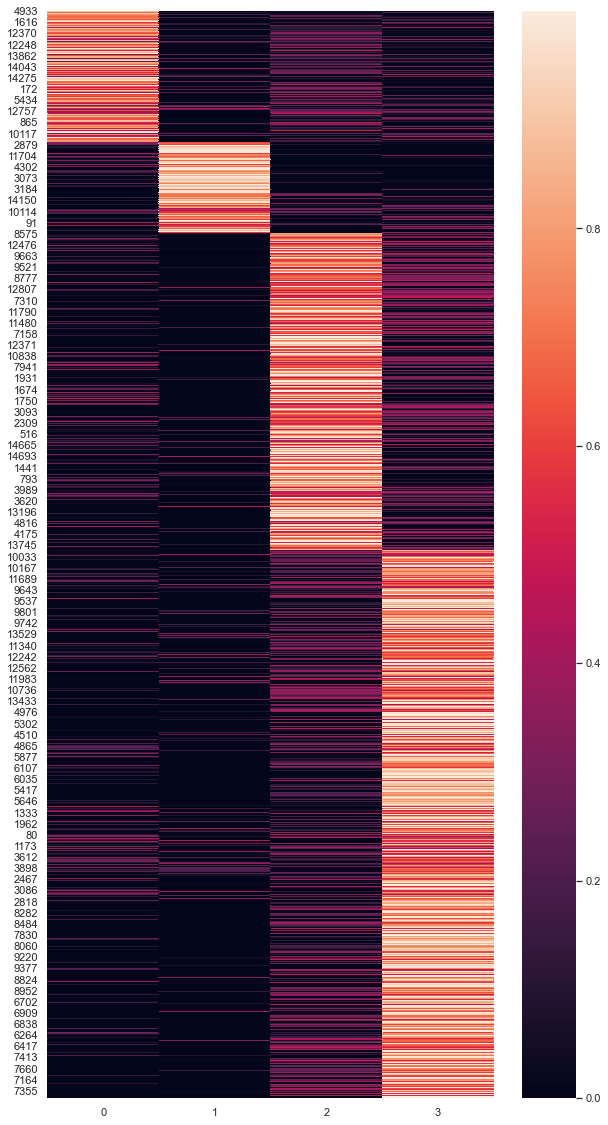

In [51]:
%matplotlib inline
import seaborn as sns; sns.set(rc={'figure.figsize':(10,20)})
sns.heatmap(document_topic.loc[document_topic.idxmax(axis=1).sort_values().index])

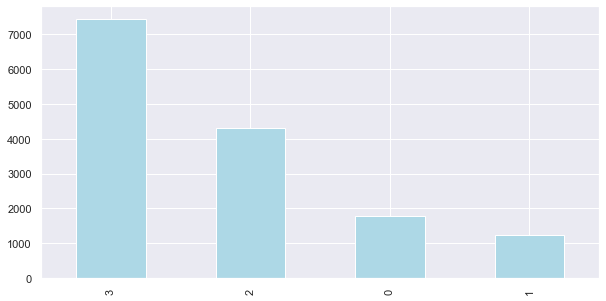

In [52]:
sns.set(rc={'figure.figsize':(10,5)})
document_topic.idxmax(axis=1).value_counts().plot.bar(color='lightblue')

In [53]:
%matplotlib inline
import pyLDAvis
import pyLDAvis.gensim
vis = pyLDAvis.gensim.prepare(topic_model=lda_model, corpus=corpus, dictionary=dictionary_LDA)
pyLDAvis.enable_notebook()
pyLDAvis.display(vis)

In [54]:
cm = CoherenceModel(model=lda_model,corpus=corpus, coherence='u_mass')
coherence_umass = cm.get_coherence()  # get coherence value

In [55]:
coherence_umass

-2.3470474742203784

In [56]:
cm_v = CoherenceModel(model=lda_model,texts=new_list,dictionary=dictionary_LDA, coherence='c')
with np.errstate(invalid='ignore'):
    lda_score = cm_v.get_coherence()

In [60]:
lda_score

0.6014214324228239


In [61]:
cm_uci = CoherenceModel(model=lda_model,texts=new_list,dictionary=dictionary_LDA, coherence='c_uci')
with np.errstate(invalid='ignore'):
    lda_score = cm_uci.get_coherence()

In [62]:
lda_score

-1.0752443147704456

In [63]:
cm_uci = CoherenceModel(model=lda_model,texts=new_list,dictionary=dictionary_LDA, coherence='c_npmi')
with np.errstate(invalid='ignore'):
    lda_score = cm_uci.get_coherence()

In [64]:
lda_score

-0.02045340739362371

In [66]:
lda_model.save('lda_bow.model')

In [67]:
corpus

[[(0, 1),
  (1, 1),
  (2, 1),
  (3, 1),
  (4, 1),
  (5, 1),
  (6, 1),
  (7, 1),
  (8, 1),
  (9, 1),
  (10, 1),
  (11, 1),
  (12, 1),
  (13, 1),
  (14, 1),
  (15, 1),
  (16, 1),
  (17, 1),
  (18, 1),
  (19, 1),
  (20, 1),
  (21, 1),
  (22, 1),
  (23, 1),
  (24, 1),
  (25, 1),
  (26, 1),
  (27, 1),
  (28, 1),
  (29, 1),
  (30, 1),
  (31, 1),
  (32, 1),
  (33, 1),
  (34, 1),
  (35, 1),
  (36, 1),
  (37, 1),
  (38, 1),
  (39, 1),
  (40, 1),
  (41, 6),
  (42, 2),
  (43, 1),
  (44, 1),
  (45, 5),
  (46, 1),
  (47, 1),
  (48, 1),
  (49, 1),
  (50, 1),
  (51, 1),
  (52, 1),
  (53, 1),
  (54, 2),
  (55, 1),
  (56, 2),
  (57, 1),
  (58, 1),
  (59, 1),
  (60, 1),
  (61, 1),
  (62, 1),
  (63, 1),
  (64, 1),
  (65, 1),
  (66, 1),
  (67, 1),
  (68, 1),
  (69, 1),
  (70, 1),
  (71, 2),
  (72, 1),
  (73, 1),
  (74, 1),
  (75, 1),
  (76, 1),
  (77, 1),
  (78, 1),
  (79, 1),
  (80, 1),
  (81, 1),
  (82, 1),
  (83, 1),
  (84, 1),
  (85, 3),
  (86, 1),
  (87, 1),
  (88, 1),
  (89, 1),
  (90, 1),
  (91, 1)